# **Milestone, Final Notebook**

### Table of Contents

* [Read the dataset](#read_the_dataset)
* [Analyze Summary Statistics](#analyze)
* [Exploratory Data Analysis and Visualization](#eda)
* [Understanding observations on missing values](#missing)
* [Treating Outliers and Missing values](#treating)
* [Data Preparation](#data_preparation)
* [Model Evaluation Criterion](#model)
    * [Logistic Regression Model](#lg)
    * [Decision Tree with Class Weights](#d_tree_weight)
    * [Decision Tree - Hyperparameter Tuning](#d_tree_tuned)
    * [Random Forest](#rf_estimator)
    * [Random Forest model with Class Weights](#rf_estimator_weight)
    * [Random Forest model  - Hyperparameter Tuning](#rf_estimator_tuned)
    * [Comparing Model Performances](#compare)
* [Final Insights](#insights)

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

### **Import the necessary libraries**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
import scipy.stats as stats

#To tune the model
from sklearn.model_selection import GridSearchCV

#Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score, precision_recall_curve

### **Read the dataset** <a class="anchor" id="read_the_dataset"></a>

In [2]:
# Load CSV file
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [4]:
# Display first five rows
data.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
# Display last 5 rows
data.tail(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [6]:
# Check the shape of the data
data.shape

(5960, 13)

**Insights ________**

- There are 5,960 observations in 13 columns.

### **Check the data types of the columns**

In [7]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights ______________**

- There are a total of 13 columns and 5,960 observations in the dataset.
- Out of the 13 columns we have only 2 object type and the rest are numerical.
- We have an important number of missing values, only the BAD and LOAN column have no missing values.

### **Check for missing values**

In [8]:
# Analyse missing values 
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
# Check the percentage of missing values in the each column.
# Divide the result from the previous code by the number of rows in the dataset
data.isnull().sum()/len(data)*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Insights ________**

- DEBTINC is the column with more missing values with over 21% of the dataset.
- DEROG is the second column with more missing values with over 11%.
- The rest of the column have between ~1% and ~9% of missing values.
- Only BAD and LOAN have no missing values.

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [10]:
# Separate object type columns on the variable cols and add them to a list
cols = data.select_dtypes(['object']).columns.tolist()

# Adding target variable to this list as this is an classification problem and the target variable is categorical
cols.append('BAD')

In [11]:
cols

['REASON', 'JOB', 'BAD']

In [12]:
# Changing the data type of object type column to category.
for i in cols:
    data[i] = data[i].astype('category')

In [13]:
# Checking the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset** <a class="anchor" id="analyze"></a>

In [14]:
# Analyze the summary statistics for numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights ______________**

- The average mean of LOAN is 18k while the median is 16k the standard deviation is 11k which means that around 2/3 of the loans are between 7k and 29k. We can see that the maximum loan is 89,900.
- The amount due range is high; it goes between 2,063 and 399,550 while the mean is 73,760.
- The mean value of the properties is ~101k while the most expensive property has a value of 855k.
- The average years at present jobs of the applicants is 8.9 years, the standard deviation is 7.5. 2/3 of the applicants have worked for the same company between ~1 and ~16 years.
- The age of the oldest credit line shows that in average the applicants have a 14-year-old as the oldest credit line, the maximum value shows a 97-year-old credit, this will be treated as outlier later on, possibly this was a manually mistyped data .
- There is a slightly difference between the mean and the median in every column, that tells us that the dataset is probably skewed in one direction or another.
- In average the applicants have ~20 existing credit lines, in the extreme case at least one applicant has 71.

In [15]:
# Check summary for categorical data - Inside describe function you can use the argument include=['category']
data.describe(include=['category'])

,BAD,REASON,JOB
count,5960,5708,5681
unique,2,2,6
top,0,DebtCon,Other
freq,4771,3928,2388


**Insights _____________**

- The variable BAD shows 5,960 observations, we have only 2 unique values which is loan repaid as 0 and loan non repaid as 1
- The variable REASON has two unique values home improvement (31%) and debt consolidation (68%).
- There are 5 different kind of defined jobs the applicants have, but most of them lays in the category 'other'.

**Let's look at the unique values in all the categorical variables**

In [16]:
# Printing the count of each unique value in each categorical column represented in percentage    
for i in cols:
    print(data[i].value_counts(normalize=True))
    print('*'*40)

DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************
0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************


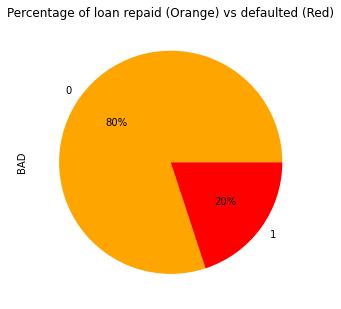

In [17]:
data.BAD.value_counts().plot(figsize=(5,10), kind='pie', y='points', autopct='%1.0f%%',
                                colors = ['orange', 'red'],
                                title='Percentage of loan repaid (Orange) vs defaulted (Red)');

**Insights _____________**

- BAD 1 = "defaulted", 0 = "repaid"
- We observe that `~80% of the applicants paid back while ~20% did not`, this is the specific area we need to predict to avoid losing resources.
- REASON: home improvement 31% or debt consolidation 68%.
- JOB: 5 specific jobs and 1 category as others, this could have many other occupations, that over 42% of the observations, this information is very general, we might need more categories to better detect patterns to help us understand the relationship between type of jobs and payback ratio.

## **Exploratory Data Analysis (EDA) and Visualization** <a class="anchor" id="eda"></a>

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [18]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(10,8), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

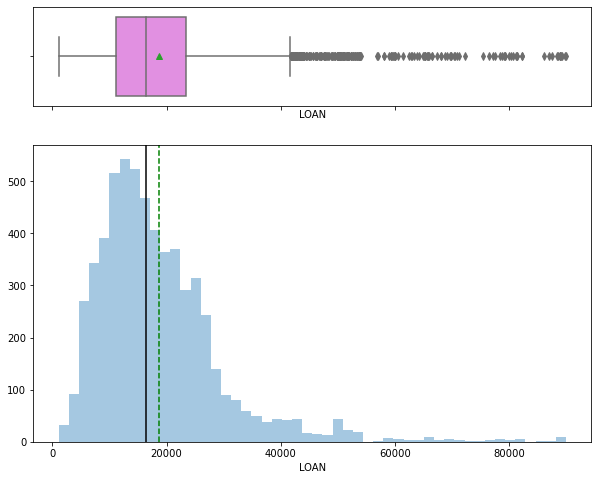

In [19]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights __________**

- In the LOAN boxplot it's remarkable the amount of outliers.
- In the LOAN histogram we can see that the distribution is close to normal distribution with numerous extreme observations to the right, the variable is slightly skewed to the right.
- In both the boxplot and the histogram, we can see that the mean is not very far from the median.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

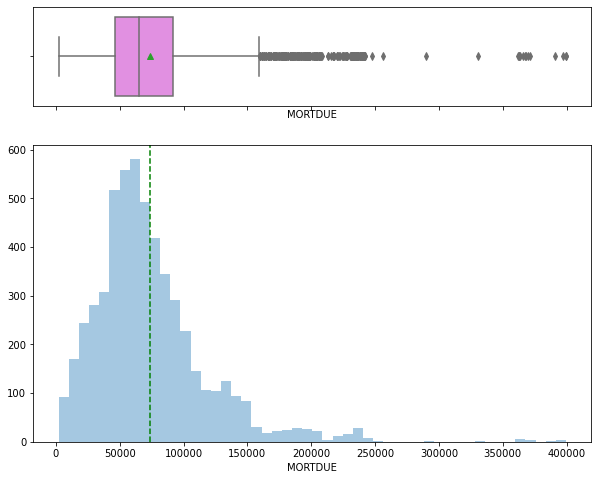

In [20]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['MORTDUE'])

- In the MORTDUE boxplot it's also remarkable the numner of outliers, that means that a big number of applicants have higher than average amount due.
- In the MORTDUE histogram we can see that the distribution is close to normal distribution, however it is slightly skewed to the right.
- In both the boxplot and the histogram, we can see that the mean is not very far from the median.

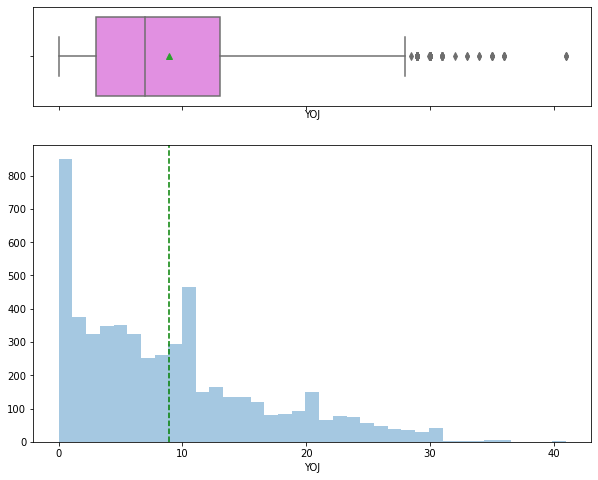

In [21]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['YOJ'])

- The distribution plot shows that an important number of applicants who received the loan are new in their jobs.
- Based on the distribution plot trend we can infer that longer they work for a company, they request loans.

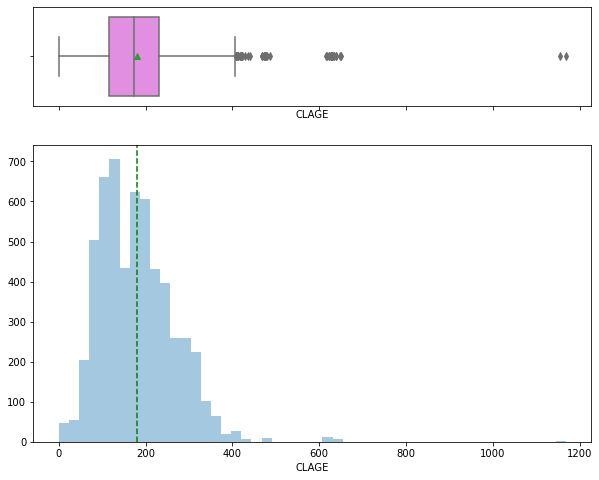

In [22]:
# Build the histogram boxplot for age of the oldest credit line in months
histogram_boxplot(data['CLAGE'])

**Insights ____________**

- We can observe a bimodal distribution, the median and mean are very close, but we can see some customers with old credit lines, the average is ~15 years.

### **2. Univariate Analysis - Categorical Data**

In [23]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

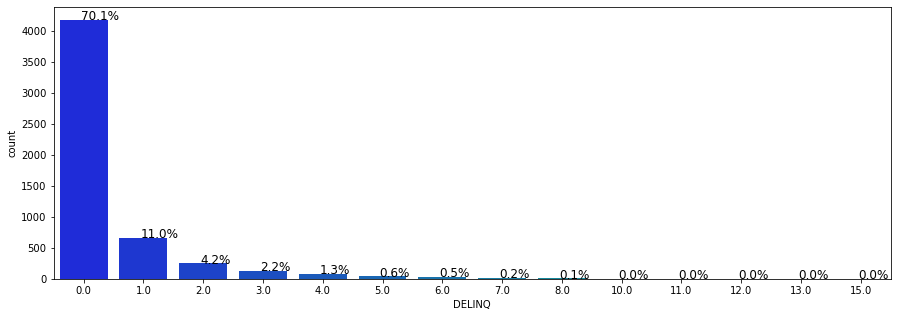

In [24]:
#Build barplot for DELINQ
plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights ________**

- We can observe that a majority of the applicants don't have delinquent credit lines, the 11% of applicants have one delinquent credit line and the number decreases proportionately

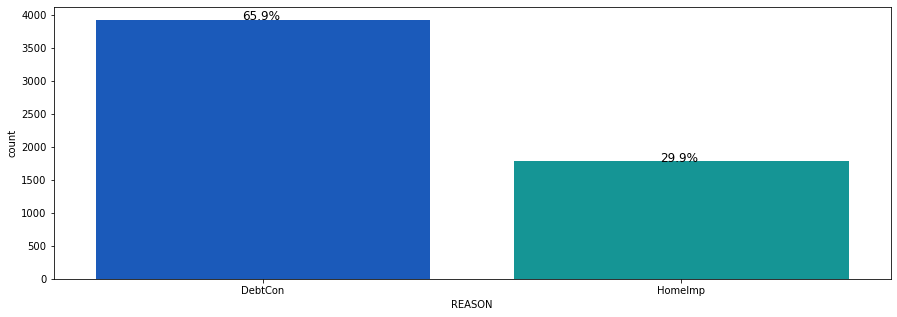

In [25]:
#Build barplot for REASON
plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

- Now in a boxplot we can graphically see the reason for the loan, over 65% requested a loan to cover debt consolidation while only a 29% did it for home improvement

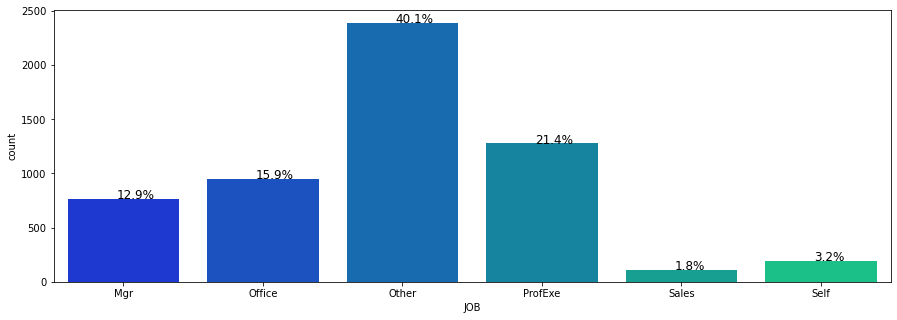

In [26]:
#Build barplot for JOB

plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

- Since the job category Other is the majority on this dataset, it's difficult to get better insights, however, we take the rest of the categories as an important reference and based on that we can find patterns. We observe that self-employees requested more loans than sales people, that is an interesting piece of information.

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

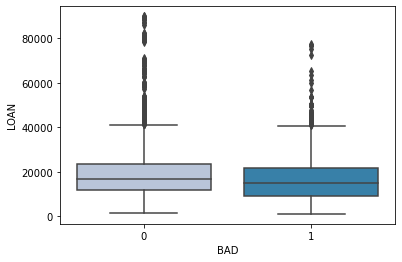

In [27]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")
plt.show()

**Insights ______**

- There is not a considerable difference between those who paid and those who didn't in relationship with the loan amount, therefore, we cannot consider the loan amount a factor to determine who will pay back.

**Note:** As shown above, performing Bi-Variate Analysis on different pair of Categorical and continuous variables

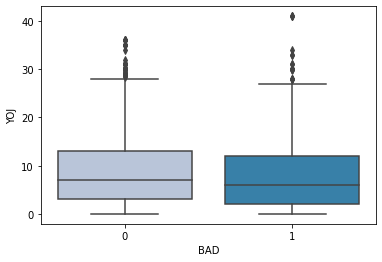

In [28]:
sns.boxplot(data["BAD"],data['YOJ'],palette="PuBu")
plt.show()

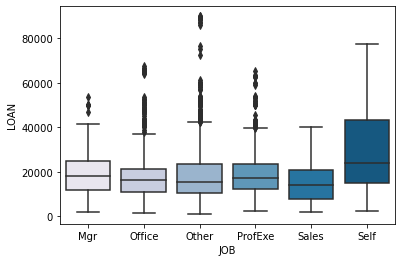

In [29]:
sns.boxplot(data["JOB"],data['LOAN'],palette="PuBu")
plt.show()

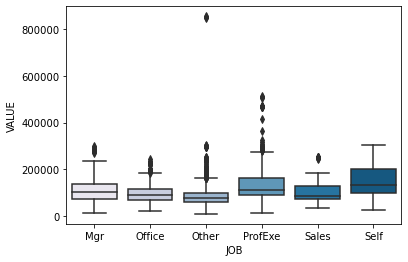

In [30]:
sns.boxplot(data["JOB"],data['VALUE'],palette="PuBu")
plt.show()

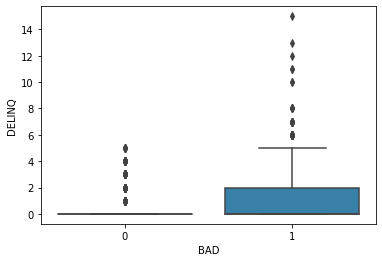

In [31]:
sns.boxplot(data["BAD"],data['DELINQ'],palette="PuBu")
plt.show()

**Insights ______**

- We can observe that years at present job is not a factor to consider when trying to understand defaulted customers.
- In the second boxplot we can observe that self-employees have a wider loan amount and compared with other kind of jobs the minimum amount is higher than the other groups, it also shows no outliers, despite the big range there are no extremes.

### **Bivariate Analysis: Two Continuous Variables**

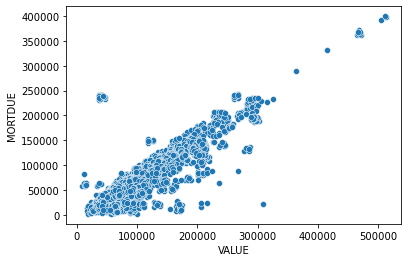

In [32]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")
plt.show()

**Insights: _____**

- As expected, there is a clear relationship between the property value and the amount due on the existing mortgage, more expensive the property more the amount due.
- Just a few cases where the value is not that high but they have a high amount due, there is a small cluster in the 40k value and 240k due.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [33]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='icefire')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


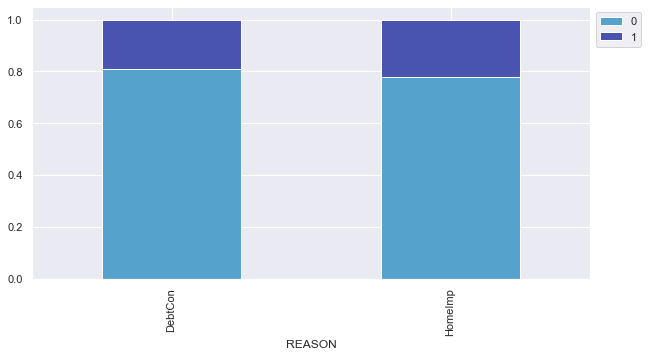

In [34]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights ____________**

- In terms of who return the loan, we can see that there is not a big difference between those request the loan for home improvement and those for debt consolidation, around 3%.
- There are more than double the applicants who requested the loan who need the funds for debt consolidation.
- We cannot conclude that the reason for the loan is a factor to consider to determine who would pay off the debt.

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


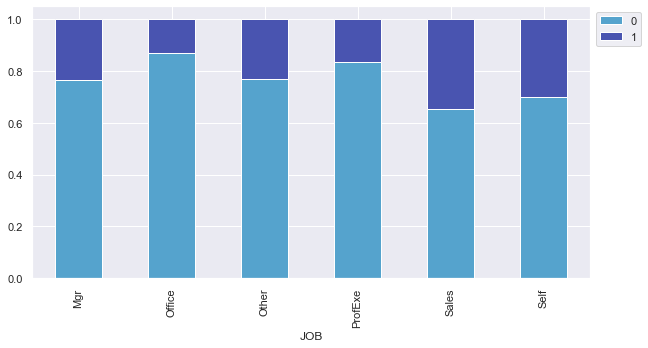

In [35]:
# Plot stacked bar plot for BAD and JOB
stacked_plot(data['JOB'])

**Insights ___________________**

- Those applicants who work in Office have a better ratio of paying off, ~86% paid the loan.
- Those applicants who work in Sales have a worse ratio of paying off, only ~65% paid the loan, however, we have to consider that this is the kind of job with less applicants compared with the rest of the dataset.
- Self-employees have the second worse paying off ratio, but also the applicants that belong to this category are a small number compared with the rest, we would need more data to determine that sales and self-employees have less chances of paying off.

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
------------------------------------------------------------------------------------------------------------------------


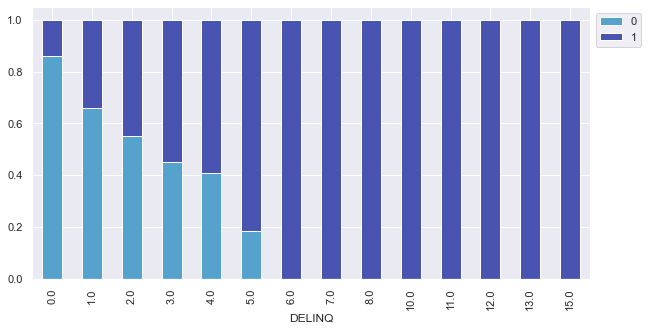

In [36]:
# Plot stacked bar plot for BAD and JOB
stacked_plot(data['DELINQ'])

- As observed on this plot, more delinquent credit lines less changes to pay back the loan, this is an important factor to consider.

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

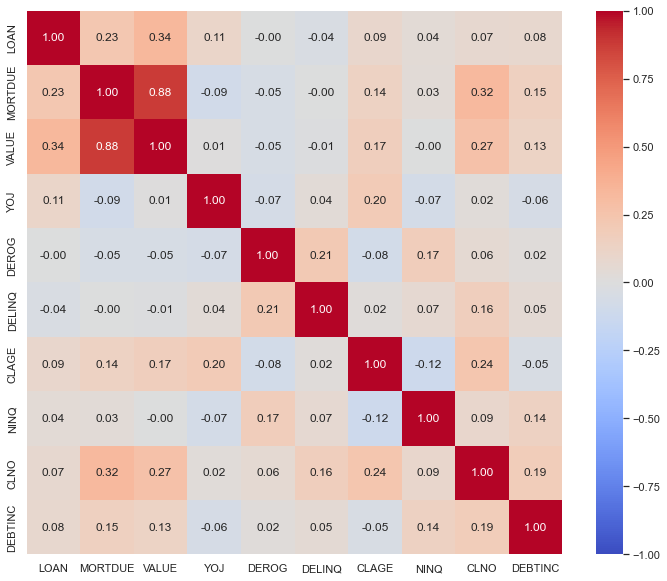

In [37]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
corr = data[numerical_col].corr()

# plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,annot=True,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

**Insights ______**
- The strongest relationship we find is the amount due on the existing mortgage with the current value of the property.
- Not as strong but in second place we find a relationship between the LOAN with the VALUE.
- There is a 3rd relationship found that is worth to analyze which is the correlation between the number of existing credit lines (CLNO) with MORTDUE (amount due on the existing mortgage), VALUE (current value of the property) and CLAGE (Age of the oldest credit line in months).

In [38]:
# Group by the variable BAD to compare the average on each attribute
data.groupby("BAD").mean().T

BAD,0,1
LOAN,19028.107315,16922.119428
MORTDUE,74829.249055,69460.452973
VALUE,102595.921018,98172.846227
YOJ,9.154941,8.027802
DEROG,0.134217,0.707804
DELINQ,0.245133,1.229185
CLAGE,187.002355,150.190183
NINQ,1.032749,1.782765
CLNO,21.317036,21.211268
DEBTINC,33.253129,39.387645


**Insights ______**
- Comparing the mean value of each attribute between defaulted (1) and repaid (0) customers we can observe the following:
- - The years on present job is in average lower in the defaulted group than those who repaid the loan.
- - The average on **derogatory reports is considerable higher** on the defaulted group.
- - The average on **delinquent credit lines is considerable higher** on the defaulted group. 
- - The average on **recent credit inquires is higher** on the defaulted group. 
- - The average on **debt-to-income ratio is higher** on the defaulted group.

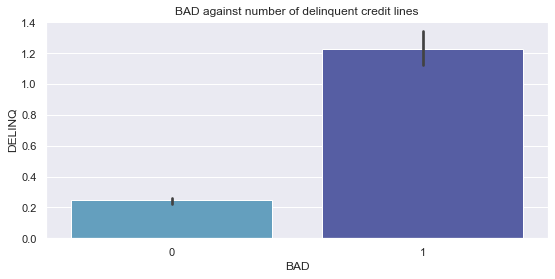

In [39]:
plt.figure(figsize=(9,4))
plt.title('BAD against number of delinquent credit lines')
sns.barplot(data=data,x='BAD',y='DELINQ')
plt.show()

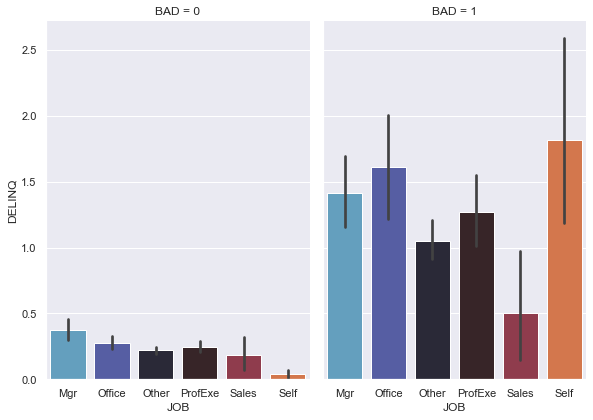

In [40]:
g = sns.catplot(x="JOB", y="DELINQ",
                 col="BAD",
                data=data, kind="bar",
                height=6, aspect=.7);

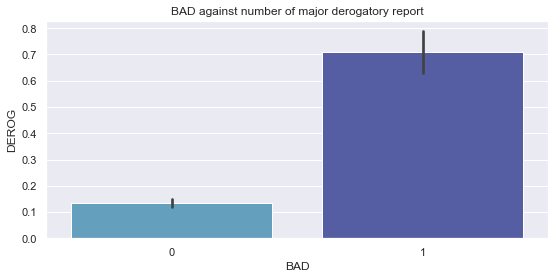

In [41]:
plt.figure(figsize=(9,4))
plt.title('BAD against number of major derogatory report')
sns.barplot(data=data,x='BAD',y='DEROG')
plt.show()

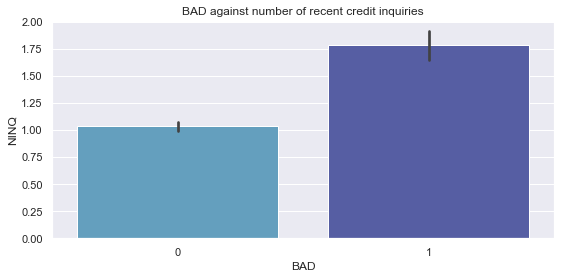

In [42]:
plt.figure(figsize=(9,4))
plt.title('BAD against number of recent credit inquiries')
sns.barplot(data=data,x='BAD',y='NINQ')
plt.show()

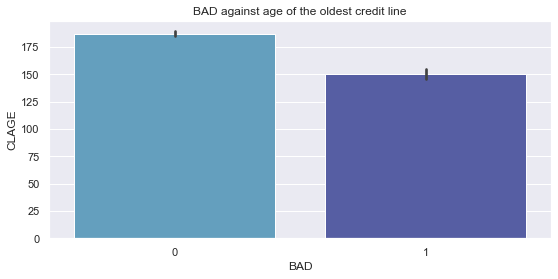

In [43]:
plt.figure(figsize=(9,4))
plt.title('BAD against age of the oldest credit line')
sns.barplot(data=data,x='BAD',y='CLAGE')
plt.show()

**Insights ______**
- **Plot #1 and #2:** We can observe the strong relationship between defaulted customers and the number of delinquent credit lines. Also, we can observe how the type a job behaves differently on each case, for example defaulted self-employees have a considerably more delinquent credit lines compared with those self-employees who repaid the loan, that's a red flag we can put in consideration.
- **Plot #3:** We can observe the delinquency rate, ***the number is high among defaulted customers*** who don't make the minimum required payments.
- **Plot #4:** Defaulted customers have a ***higher number of recent credit inquiries;*** this possibly indicates that the defaulted customer was trying to get credits somewhere else presumably because a negative record. 
- **Plot #5:** Customers who repaid have older accounts; we can assume they pay the credit loan therefore bank institutions keep working with them.

### **Understanding observations on missing values** <a class="anchor" id="missing"></a>

In [44]:
# It creates variables filtering missing values observations plus defaulted or repaid
notnull_bad_1 = data.loc[(data['BAD']==1) & (data['DEBTINC'].notnull())]  #no missing values + defaulted
notnull_bad_0 = data.loc[(data['BAD']==0) & (data['DEBTINC'].notnull())]  #no missing values + rapaid 
isnull_bad_1 = data.loc[(data['BAD']==1) & (data['DEBTINC'].isnull())]    #missing values + defaulted
isnull_bad_0 = data.loc[(data['BAD']==0) & (data['DEBTINC'].isnull())]    #missing values + repaid

                     Defaulted  Repaid
No Missing Values          403    4290
With Missing Values        786     481


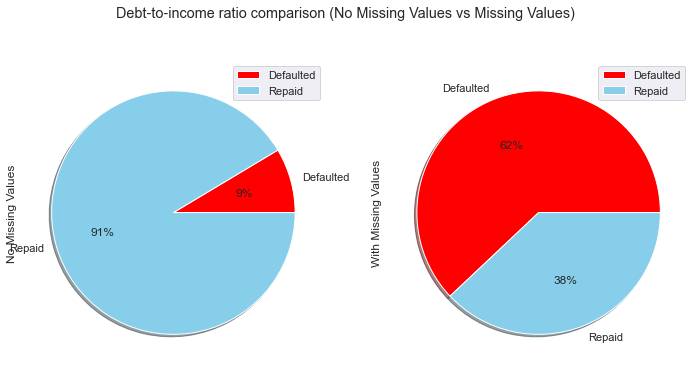

In [45]:
# I applied the len function on the new variables to get the total number on each case.

pie = pd.DataFrame({'Defaulted':[len(notnull_bad_1), len(isnull_bad_1)],
                    'Repaid':   [len(notnull_bad_0), len(isnull_bad_0)]  },
                    index=['No Missing Values','With Missing Values'])
print (pie)

pie.T.plot.pie(subplots=True, figsize=(12, 6),autopct='%1.0f%%', shadow=True, title='Debt-to-income ratio comparison (No Missing Values vs Missing Values)', colors=['red', 'skyblue']);

**Insights ______**
- We separate into 2 groups the `Debt-to-income ratio`, the one on the left represents the customers who filled out the Debt-to-income ratio field (no missing values) and on the right the customers who left that field empty (missing values); in both we can see the defaulted customers in red and the repaid customer in blue.
- We can observe a **very important difference;** on the left pie plot we can see that **the majority of customers who completed the DEBTINC field repaid the loan**, ~91%, on the other hand, we can see that more than half of **customers who didn't complete the DEBTINC field failed to pay back the loan**.
- ***We can assume that customers who are afraid of having a high debt-to-income ratio prefer not to disclose that information.***

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

### **Treating Outliers and Missing values** <a class="anchor" id="treating"></a>

#### Treating Outliers

In [46]:
#exclude DEROG & DELINQ, otherwise those become zero value when we clip
num_cols = ['LOAN','MORTDUE','VALUE','YOJ','CLAGE','NINQ','CLNO','DEBTINC'] 
   
Q1= data.quantile(q=0.25)         # 25th quantile
Q3= data.quantile(q=0.75)         # 75th quantile
IQR= Q3 - Q1                      # IQR Range
Lower_Whisker = (Q1 - 1.5 * IQR)  # define lower whisker
Upper_Whisker = (Q3 + 1.5 * IQR)  # define upper Whisker
    
# all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
# all the values above upper_whishker will be assigned value of upper_Whisker 
  
# we clip, substitute the outliers with the upper and lower whiskers 
data[num_cols] = np.clip(data[num_cols], Lower_Whisker, Upper_Whisker, axis=1)  

In [47]:
# Let's create a copy of the dataset
df = data.copy()

#### Adding new columns in the dataset for each column which has missing values 

In [48]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [49]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)

#### Filling missing values in numerical columns with median and mode in categorical variables

In [50]:
# Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.

num_data = df.select_dtypes('number')

# Fill numeric columns with median.

df[num_data.columns] = num_data.fillna(num_data.median())

In [51]:
# Treat missing values of categorical variables using mode
df.fillna(df.mode().iloc[0], inplace=True) ## convert df to a series

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

- No Missing values and flag columns created.

## **Proposed approach**
- Since the problem to solve is a classification and it is presented in binary form, we will focus on those machine learning models that deals better with categorical data such as regression models and random forest.  
- We can train the dataset separating the data into train and test and we can use and ultimately compare the following models:
•	Logistic regression model
•	Decision trees
•	Random forest 
- Since this is a binary classification problem, the model can make wrong predictions, the focus will be predicting when the customer is eligible when he/she actually is not eligible.
- We want to use past customers' data to build a model to predict whether the loan should be approved or not. This would help the company prevent potential losses, save time and focus more on eligible customers.
- After comparing the models, the measure of success will be to predict with the highest accuracy those customers who will likely default.


## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**<a class="anchor" id="data_preparation"></a>

### **Separating the target variable from other variables**

In [53]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = df.drop(columns='BAD')

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first=True)

# Create y(dependent varibale)

Y=df['BAD']

### **Splitting the data into 70% train and 30% test set**

In [54]:
# Split the data into training and test set

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=43)

**Checking the shape of the train and test data**

In [55]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4172, 27)
Shape of test set :  (1788, 27)
Percentage of classes in training set:
0    0.800096
1    0.199904
Name: BAD, dtype: float64
Percentage of classes in test set:
0    0.801454
1    0.198546
Name: BAD, dtype: float64


### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

**Observations: __________**
- Different splits produce an important difference in performance, I tried 70:30, 80:20 and even 90:10, the best performance was obtained using the 70:30
- The Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.


## **Model Evaluation Criterion**<a class="anchor" id="model"></a>

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

#### Model can make wrong predictions as:

1. Predicting a customer will repay their loan but in reality, the customer will default on loan.
2. Predicting a customer will default on loan but in reality, the customer will repay the loan. 

* Both the cases are important as:

* If we predict that the customer will repay and the loan is not repaid then the organization will lose resources and will have to bear additional costs.

* If we predict that a loan will get defaulted and and the loan is repaid the organization might not be able to get potential customers by assuming that they won't repay. This might damage the company income. 

#### Which case is more important? 
1. Predicting a customer default


#### How to reduce the losses?

* The organization would want `Recall for class 1` to be maximized, greater the Recall score higher are the chances of minimizing False Negatives. 

In [56]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Repaid', 'Defaulted'], yticklabels=['Repaid', 'Defaulted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** <a class="anchor" id="lg"></a>

In [57]:
# Defining the Logistic regression model
lg = LogisticRegression(solver='newton-cg')

# Fitting the model on the training data 
lg.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3338
           1       0.78      0.60      0.67       834

    accuracy                           0.88      4172
   macro avg       0.84      0.78      0.80      4172
weighted avg       0.88      0.88      0.88      4172



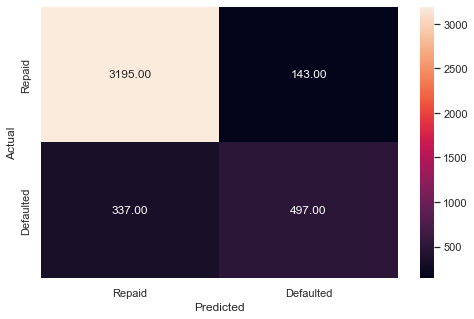

In [58]:
#Predict for train set
y_pred_train = lg.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1433
           1       0.81      0.59      0.69       355

    accuracy                           0.89      1788
   macro avg       0.86      0.78      0.81      1788
weighted avg       0.89      0.89      0.89      1788



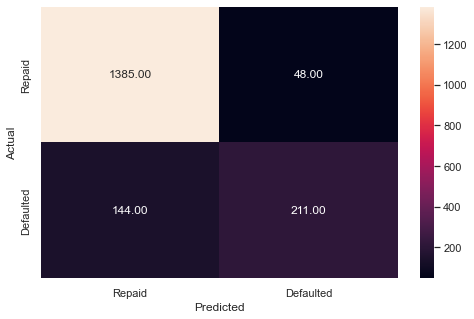

In [59]:
#Predict for test set
y_pred_test = lg.predict(X_test)


#checking the performance on the test dataset
metrics_score(y_test, y_pred_test)

**Observations: __________**

- The accuracy in both the test and training show over 88%, however, the recall on class 1 is below 60%, this will produce negative results at identifying defaulted customers. 

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [60]:
pd.Series(lg.coef_[0], index=X_train.columns).sort_values(ascending=False)

VALUE_missing_values_flag      2.663147e+00
DEBTINC_missing_values_flag    2.450132e+00
CLNO_missing_values_flag       1.423424e+00
CLAGE_missing_values_flag      1.296290e+00
JOB_Sales                      9.115562e-01
DELINQ                         7.103709e-01
DEROG                          4.857935e-01
MORTDUE_missing_values_flag    4.022121e-01
JOB_Self                       3.121874e-01
REASON_HomeImp                 2.334366e-01
NINQ                           1.251705e-01
DEBTINC                        5.804418e-02
VALUE                          2.014416e-06
LOAN                           9.166835e-08
MORTDUE                       -3.352131e-06
CLAGE                         -6.483198e-03
CLNO                          -1.201159e-02
REASON_missing_values_flag    -2.154906e-02
YOJ                           -2.824878e-02
JOB_Other                     -4.604822e-02
NINQ_missing_values_flag      -2.161658e-01
JOB_ProfExe                   -2.936920e-01
DELINQ_missing_values_flag    -3

**Insights ________**

- According to the coefficients the Value of the property on missing values is the most important factor, followed by DEBTINC with missing values and CLNO with missing values.

### **Build a Decision Tree Model**<a class="anchor" id="d_tree_weight"></a>

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

In [61]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
d_tree_weight = DecisionTreeClassifier(random_state=43, class_weight={0:0.2, 1:0.8})

In [62]:
#fitting Decision tree model
d_tree_weight.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=43)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3338
           1       1.00      1.00      1.00       834

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



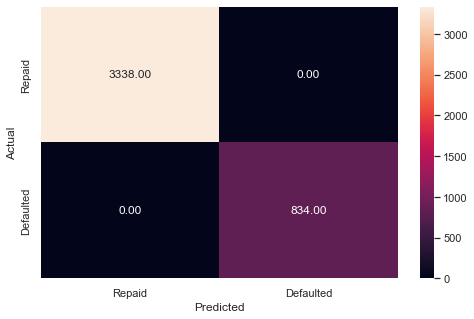

In [63]:
# Checking performance on the training data
y_pred_train2 = d_tree_weight.predict(X_train)
metrics_score(y_train,y_pred_train2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1433
           1       0.73      0.63      0.68       355

    accuracy                           0.88      1788
   macro avg       0.82      0.79      0.80      1788
weighted avg       0.88      0.88      0.88      1788



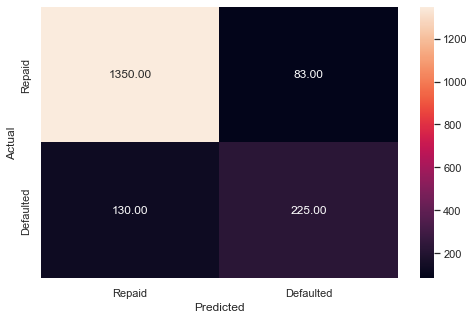

In [64]:
# Checking performance on the testing data
y_pred_test2 = d_tree_weight.predict(X_test)
metrics_score(y_test,y_pred_test2)

**Insights _____________**

- The Decision tree model with class weights is giving 100% results on the training dataset, 100% accuracy and recall.
- The Decision Tree works perfectly on the training data but **not as accurate on the test data** as the recall is 0.63 for class 1 as compared to 1.00 for the training dataset. 
- The precision on the test data suggests that there's a 23% (1-0.73) chance that the model will predict that a person is going to get a loan when he/she should not, and this **would result in financial loss to the company.**

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**<a class="anchor" id="d_tree_tuned"></a>

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [65]:
# Choose the type of classifier. 
# Remove _________ and complete the code
d_tree_tuned = DecisionTreeClassifier(random_state=43, class_weight={0:0.2, 1:0.8})

# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_depth': np.arange(2,14), 
              'criterion': ['gini', 'entropy'],
               'max_leaf_nodes': [20,30,55],
              'min_samples_leaf': [10,30,40]
             }


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)

# Fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
# Remove _________ and complete the code
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
# Remove _________ and complete the code
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=13,
                       max_leaf_nodes=55, min_samples_leaf=30, random_state=43)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      3338
           1       0.56      0.89      0.69       834

    accuracy                           0.84      4172
   macro avg       0.77      0.86      0.79      4172
weighted avg       0.89      0.84      0.85      4172



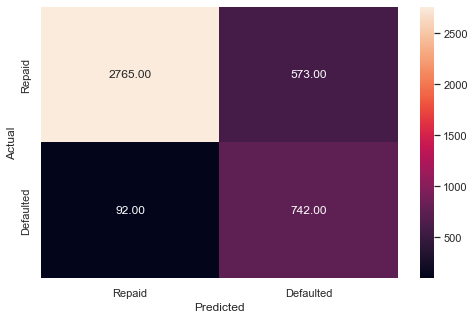

In [66]:
# Checking performance on the training data based on the tuned model

y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train,y_pred_train2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      1433
           1       0.56      0.86      0.68       355

    accuracy                           0.84      1788
   macro avg       0.76      0.85      0.79      1788
weighted avg       0.88      0.84      0.85      1788



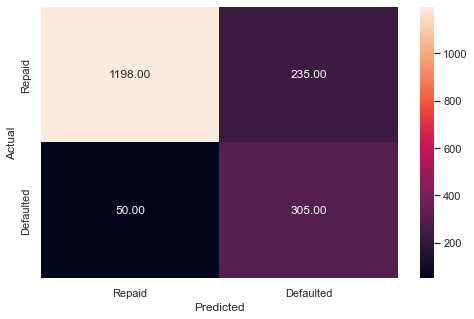

In [67]:
# Checking performance on the testing data based on the tuned model

y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test,y_pred_test2)

**Insights ___________**

- With the Hyperparameter Tuning the Decision Tree shows **worse performance on the training data** compared with the Decision Tree with weight parameters, the recall is 0.89 for class 1 as compared to 1.00 using the weight model.
- The precision on the train data suggests that there's a 44% (1-0.56) chance that the model will predict that a person is going to get a loan when he/she should not, the chances seem high to get wrongs results with this tuning model, the recall performance was lower than the weight model.

- The Hyperparameter Tuning Decision Tree performance in the test data is slightly worse than the training data, however, the recall is 0.86 for class 1 as compared to 0.89 obtained in the training dataset, however, **this recall is higher than any previous model, therefore this model with the Hyperparameter Tuning shows the best result so far.**
- This hyperparameter has maximized the recall.

#### Plotting the Decision Tree

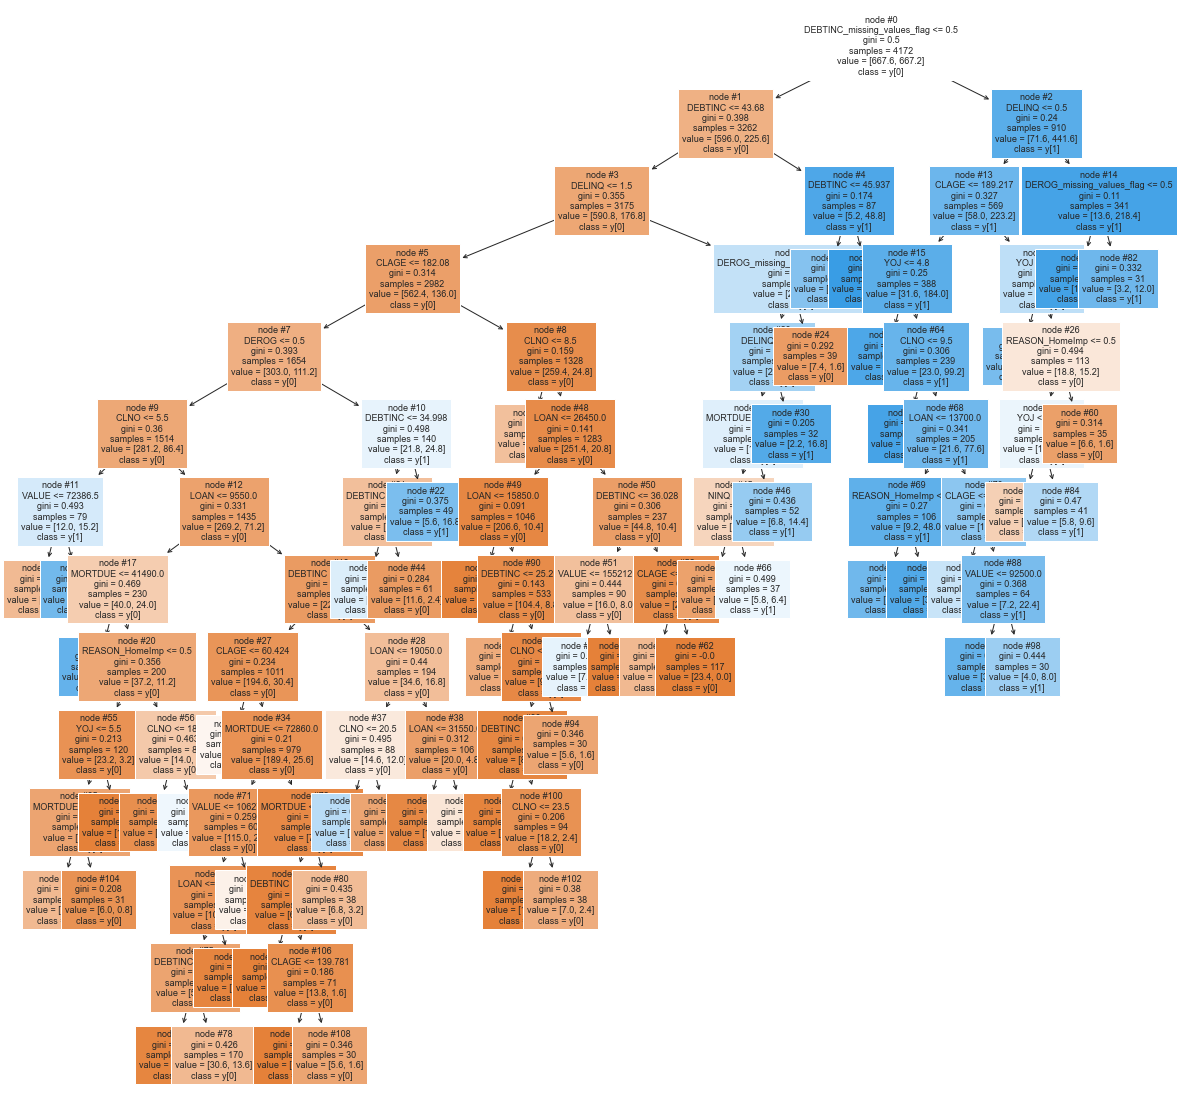

In [68]:
# Plot the decision tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize=(20,20))

tree.plot_tree(d_tree_tuned,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down: _____

- We can see that the first split is based on debt-to-income ratio with missing values, this is the initial factor to determine who might default the loan, if the customer has a missing value on the debt-to-income ratio column then it moves to the right of the graph.
- Based on the color coded we have a visual aid that shows that the left side of the graph most of the leaves are orange, showing customers who repaid the loan, on the other side we can see blue leaves indicating clients defaulted on loans.
- In the second node for those who have no missing values on DEBTINC the next condition is if the DEBTINC is less than 43.68, if this is true once again the tree moves to the blue area and the next validation attribute is again DEBTINC, but if not it moves to the left where DELINQ is the next node with importance.


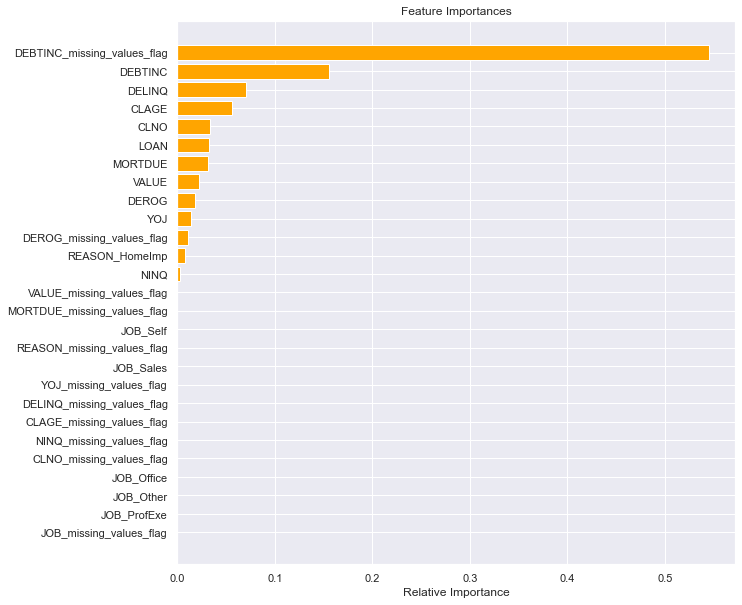

In [69]:
#Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### **Building a Random Forest Classifier**<a class="anchor" id="rf_estimator"></a>

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [70]:
# Defining Random forest CLassifier

rf_estimator = RandomForestClassifier(random_state=43)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=43)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3338
           1       1.00      1.00      1.00       834

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



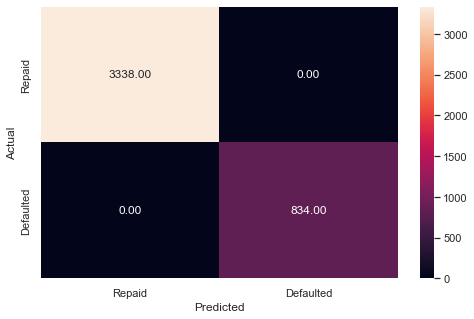

In [71]:
#Checking performance on the training data

y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1433
           1       0.86      0.71      0.77       355

    accuracy                           0.92      1788
   macro avg       0.89      0.84      0.86      1788
weighted avg       0.92      0.92      0.92      1788



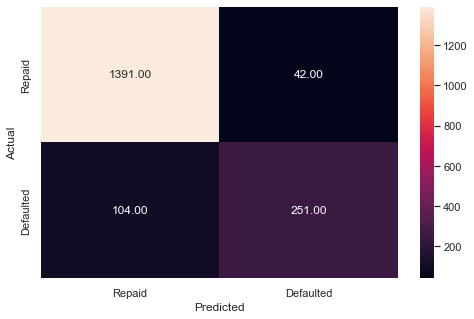

In [72]:
# Checking performance on the test data

y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

**Observations: __________**

- The Random Forest model is giving 100% results on the training dataset, 100% accuracy and recall.
- The Random Forest model works perfectly on the training data but **not as accurate on the test data** as the recall is 0.71 for class 1 as compared to 1.00 for the training dataset. 
- The precision on the test data suggests that there's a 14% (1-0.86) chance that the model will predict that a person is going to get a loan when he/she should not, and this **would result in financial loss to the company.** 
- The recall on the test data is inferior compared to the decision tree with hyperparameters 71% vs 86%.

### **Build a Random Forest model with Class Weights**<a class="anchor" id="rf_estimator_weight"></a>

In [73]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

rf_estimator_weight = RandomForestClassifier(random_state=43, class_weight={0:0.2, 1:0.8})

# Fitting Random Forest model

rf_estimator_weight.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=43)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3338
           1       1.00      1.00      1.00       834

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



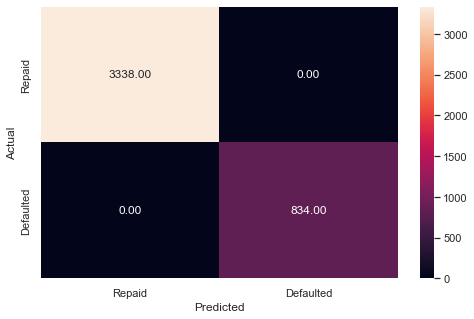

In [74]:
# Checking performance on the train data

y_pred_train4 = rf_estimator_weight.predict(X_train)
metrics_score(y_train, y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1433
           1       0.87      0.70      0.77       355

    accuracy                           0.92      1788
   macro avg       0.90      0.84      0.86      1788
weighted avg       0.92      0.92      0.92      1788



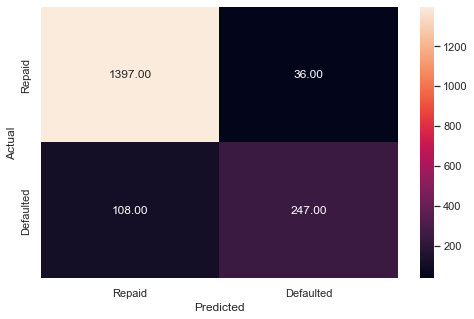

In [75]:
# Checking performance on the test data

y_pred_test4 = rf_estimator_weight.predict(X_test)
metrics_score(y_test, y_pred_test4)

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**<a class="anchor" id="rf_estimator_tuned"></a>

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [76]:
# Choose the type of classifier. 

rf_estimator_tuned = RandomForestClassifier(random_state=43, n_jobs = -1, class_weight={0:0.2, 1:0.8})

# Grid of parameters to choose from
parameters = {"n_estimators": [120],
                 'criterion': ['gini', 'entropy'],
     "max_depth": np.arange(10,14),
    'max_features':['log2'],
              'max_leaf_nodes': [55],
            'min_samples_leaf': [10],
              'bootstrap': [True],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)

#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator_tuned.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=13,
                       max_features='log2', max_leaf_nodes=55,
                       min_samples_leaf=10, n_estimators=120, n_jobs=-1,
                       random_state=43)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3338
           1       0.66      0.85      0.74       834

    accuracy                           0.88      4172
   macro avg       0.81      0.87      0.83      4172
weighted avg       0.90      0.88      0.89      4172



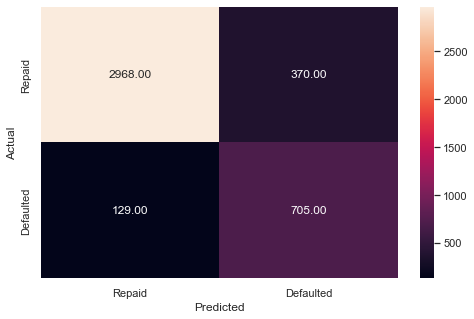

In [77]:
# Checking performance on the training data

y_pred_train5 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train5)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1433
           1       0.68      0.82      0.74       355

    accuracy                           0.89      1788
   macro avg       0.82      0.86      0.84      1788
weighted avg       0.90      0.89      0.89      1788



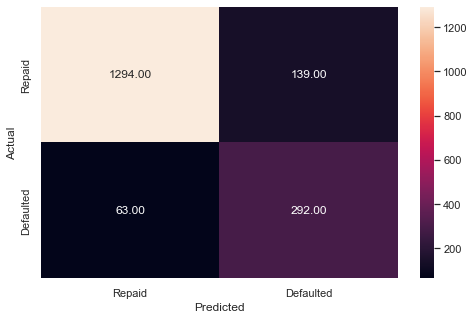

In [78]:
# Checking performace on test dataset

y_pred_test5 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test5)

**Insights: _____**

- The hyperparameters Random Forest test data is almost as accurate on the training data as the recall is 0.82 for class 1 as compared to 0.85 for the training dataset. 
- The precision on the test data suggests that there's a 32% (1-0.68) chance that the model will predict that a person is going to get a loan when he/she should not, and this **would result in financial loss to the company.** 
- The recall value is the higher number observed on a Random Forest, however, the value is not as high the hyperparameter decision tree model.
- The Random Forest shows a slightly better overall performance, but the defaulted prediction factor is better captured with the hyperparameter decision tree.

#### Plot the Feature importance of the tuned Random Forest

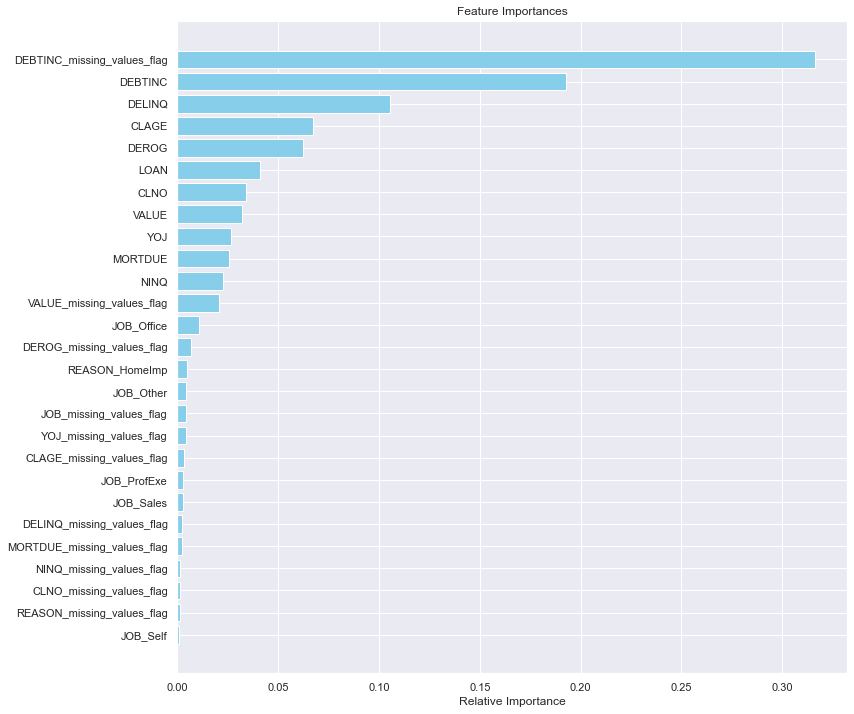

In [79]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Insights: _____**

- The Featured importance show similar results in both the decision tree with hyperparameters and the random forest with hyperparaments, according to those the DEBTINC with missing values is the most important feature to predict if the clients will default on loan.
- The DEBTINC is the second most important element in both models, we can conclude that the DEBTINC variable as a whole is the most important to consider.
- The DELINQ is the 3rd most important variable, followed by CLAGE.

### **Comparing Model Performances**<a class="anchor" id="compare"></a>

In [80]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [81]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [82]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [83]:
# Make the list of all the model names 

models = [lg, d_tree_weight, d_tree_tuned, rf_estimator, rf_estimator_weight, rf_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [84]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':['Logistic Regression Model','Decision Tree Weight','Decision Tree Tuned','Random Forest','Random Forest Weight','Random Forest Tuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test Recall,Train_Precision,Test_Precision
0,Logistic Regression Model,0.884947,0.892617,0.595923,0.594366,0.776563,0.814672
1,Decision Tree Weight,1.000000,0.880872,1.000000,0.633803,1.000000,0.730519
2,Decision Tree Tuned,0.840604,0.840604,0.889688,0.859155,0.564259,0.564815
3,Random Forest,1.000000,0.918345,1.000000,0.707042,1.000000,0.856655
4,Random Forest Weight,1.000000,0.919463,1.000000,0.695775,1.000000,0.872792
5,Random Forest Tuned,0.880393,0.887025,0.845324,0.822535,0.655814,0.677494


### **Insights**<a class="anchor" id="insights"></a>

**1. Comparison of various techniques and their relative performance -** 

- 7 different models were trained, getting a variety of results
- In terms of overall performance, the random forest with weight parameters shows the best results predicting with high grade of accuracy both classes, however, the recall value is not as good compared with the decision tree with hyperparameters
- The logistic regression model shows overall the worse performance.
- As we can observe, the test recall on the tuned decision tree shows the best performance with ~85%, this means that this model will perform better at detecting defaulted customers.

**2. Proposal for the final solution design -** 

- I propose the Decision Tree with hyperparameters. This model is solving the problem of detecting defaulted customers. This model shows an 86% of recall follow by 82% using the Random Forest with hyperparameters. The advantage of this model is that it will predict mode accurately those customers who might default, the disadvantage is it won’t predict well the customer who will repaid as compared with a Random Forest but since our priority is predicting the defaulted customers, we have to sacrifice some precision on the repaid customer class.

- Mode details on the PDF document

Completed by Erik Guevara, 01/21/2022